## import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import csv
import seaborn as sns

## Import Dataset

In [2]:
data = []

# read the file 
with open("./raw_data.csv", "r") as csvfile:
    file_reader = csv.reader(csvfile)

    for row in file_reader:
        data.append(row)

# change data into numpy array
data = np.array(data)

In [3]:
data
data.shape
np.savetxt("raw_data.npy",data, fmt="%s", delimiter=",")

In [4]:
header = data[0, :]
values = data[1:, :]
print("Header:\n", header, "\n\n Values:\n", values)

Header:
 ['MSN' 'YYYYMM' 'Value' 'Column_Order' 'Description' 'Unit'] 

 Values:
 [['CLETPUS' '194913' '135451.32' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195013' '154519.994' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195113' '185203.657' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ...
 ['ELETPUS' '202209' '350919.559' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202210' '314048.288' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']
 ['ELETPUS' '202211' '323198.745' '13'
  'Electricity Net Generation Total (including from sources not shown), All Sectors'
  'Million Kilowatthours']]


## Saving File

In [5]:
np.savetxt("energy.csv", data, fmt= "%s", delimiter=",")
np.savetxt("energy.npy", data, fmt= "%s", delimiter=",")

## Sources of Energy Generation in US

In [6]:
num_src = len(np.unique(values[:,4]))
src = np.unique(values[:,4])
print("The USA generates electricity from {} different sources\n".format(num_src))
print("These sources are: \n")
for x in src:
    print(x)

The USA generates electricity from 13 different sources

These sources are: 

Electricity Net Generation From Coal, All Sectors
Electricity Net Generation From Conventional Hydroelectric Power, All Sectors
Electricity Net Generation From Geothermal, All Sectors
Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors
Electricity Net Generation From Natural Gas, All Sectors
Electricity Net Generation From Nuclear Electric Power, All Sectors
Electricity Net Generation From Other Gases, All Sectors
Electricity Net Generation From Petroleum, All Sectors
Electricity Net Generation From Solar, All Sectors
Electricity Net Generation From Waste, All Sectors
Electricity Net Generation From Wind, All Sectors
Electricity Net Generation From Wood, All Sectors
Electricity Net Generation Total (including from sources not shown), All Sectors


In [7]:
print(src)

['Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation Total (including from sources not shown), All Sectors']




## Extract The Wind Energy Data

In [10]:
wind_data

array([['WYETPUS', '194913', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195013', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '195113', 'Not Available', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['WYETPUS', '202209', '27024.307', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202210', '32824.906', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '202211', '41971.407', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

In [9]:
wind_cond = values[:,4] == "Electricity Net Generation From Wind, All Sectors"
print(wind_cond)


wind_data = values[wind_cond]
print(wind_data)

wind_data.shape

[False False False ... False False False]
[['WYETPUS' '194913' 'Not Available' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '195013' 'Not Available' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '195113' 'Not Available' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ...
 ['WYETPUS' '202209' '27024.307' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '202210' '32824.906' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']
 ['WYETPUS' '202211' '41971.407' '12'
  'Electricity Net Generation From Wind, All Sectors'
  'Million Kilowatthours']]


(672, 6)

## EDA-Exploratory Data Analysis

In [ ]:
# Return the shape of my data
print("Row: ",wind_data.shape[0])
print("colum: ",wind_data.shape[1])

## Data Cleaning

in the value column, some data point include "Not Availabe" which means energy were not recorded under wind for that year.

In [23]:
wind_data[:,1]

array(['194913', '195013', '195113', '195213', '195313', '195413',
       '195513', '195613', '195713', '195813', '195913', '196013',
       '196113', '196213', '196313', '196413', '196513', '196613',
       '196713', '196813', '196913', '197013', '197113', '197213',
       '197301', '197302', '197303', '197304', '197305', '197306',
       '197307', '197308', '197309', '197310', '197311', '197312',
       '197313', '197401', '197402', '197403', '197404', '197405',
       '197406', '197407', '197408', '197409', '197410', '197411',
       '197412', '197413', '197501', '197502', '197503', '197504',
       '197505', '197506', '197507', '197508', '197509', '197510',
       '197511', '197512', '197513', '197601', '197602', '197603',
       '197604', '197605', '197606', '197607', '197608', '197609',
       '197610', '197611', '197612', '197613', '197701', '197702',
       '197703', '197704', '197705', '197706', '197707', '197708',
       '197709', '197710', '197711', '197712', '197713', '1978

In [24]:
available_mask = wind_data[:,2] != "Not Available"

wind_data = wind_data[available_mask]

## Save Clean Wind Data

In [25]:
np.savetxt("wind.csv", wind_data, fmt="%s", delimiter=",")

In [26]:
annual_mask = np.array([x[-2:] == '13' for x in wind_data[:,1]])

In [27]:
annual_wind_data = wind_data[annual_mask]

In [28]:
annual_wind_data

array([['WYETPUS', '198313', '2.668', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198413', '6.49', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198513', '5.762', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198613', '4.189', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198713', '3.541', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198813', '0.871', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '198913', '2112.043', '12',
        'Electricity Net Generation From Wind, All Sectors',
        'Million Kilowatthours'],
       ['WYETPUS', '19901

## Analysis

In [29]:
np.array([x[-2:] == '13' for x in wind_data[:,1]])

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

##  Total Energy Generated

In [30]:
all_energy = annual_wind_data[:,2].astype(float)

In [31]:
print("The total wind energy generated in USA between 1986 - 2021: {} killowatt per hours".format(all_energy.sum()))

The total wind energy generated in USA between 1986 - 2021: 2952374.691 killowatt per hours


## The Mean of Energy Generated

In [32]:
all_energy.mean()

75701.91515384616

## The Standard Deviation

In [33]:
all_energy.std()

109069.92321094654

In [34]:
all_energy.max()

378196.775

In [35]:
all_energy.min()

0.871

In [36]:
y = annual_wind_data[:,1] # year
x = annual_wind_data[:,2] # energy

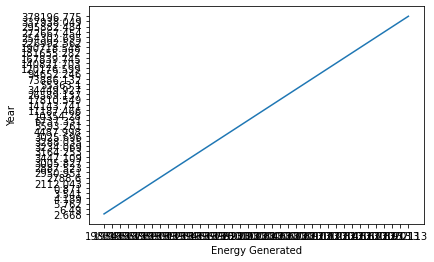

In [39]:
plt.plot(y,x)
plt.ylabel("Year")
plt.xlabel("Energy Generated")
plt.show()

## Save Energy Data To Separate Files

In [88]:
np.savetxt("wind_energy.csv", wind_data, fmt= "%s", delimiter=",")
np.savetxt("wind_energy.npy", wind_data, fmt= "%s", delimiter=",")

## Extract The Coal Energy Data

In [86]:
coal_cond = values[:,4] == "Electricity Net Generation From Coal, All Sectors"
print(coal_cond)
coal_data = values[coal_cond]
print(coal_data)
coal_data.shape

[ True  True  True ... False False False]
[['CLETPUS' '194913' '135451.32' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195013' '154519.994' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '195113' '185203.657' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ...
 ['CLETPUS' '202209' '64801.605' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '202210' '54048.626' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']
 ['CLETPUS' '202211' '56169.849' '1'
  'Electricity Net Generation From Coal, All Sectors'
  'Million Kilowatthours']]


(672, 6)

In [61]:
coal_data

array([['CLETPUS', '194913', '135451.32', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195013', '154519.994', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '195113', '185203.657', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ...,
       ['CLETPUS', '202209', '64801.605', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '202210', '54048.626', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours'],
       ['CLETPUS', '202211', '56169.849', '1',
        'Electricity Net Generation From Coal, All Sectors',
        'Million Kilowatthours']], dtype='<U80')

## EDA-Exploratory Data Analysis

In [85]:
# Return the shape of my data
print("Row: ",coal_data.shape[0])
print("colum: ",coal_data.shape[1])

Row:  672
colum:  6


## Data Cleaning

in the value column, some data point include "Not Availabe" which means energy were not recorded under 
coal for that year.

In [87]:
coal_data[:,1]

array(['194913', '195013', '195113', '195213', '195313', '195413',
       '195513', '195613', '195713', '195813', '195913', '196013',
       '196113', '196213', '196313', '196413', '196513', '196613',
       '196713', '196813', '196913', '197013', '197113', '197213',
       '197301', '197302', '197303', '197304', '197305', '197306',
       '197307', '197308', '197309', '197310', '197311', '197312',
       '197313', '197401', '197402', '197403', '197404', '197405',
       '197406', '197407', '197408', '197409', '197410', '197411',
       '197412', '197413', '197501', '197502', '197503', '197504',
       '197505', '197506', '197507', '197508', '197509', '197510',
       '197511', '197512', '197513', '197601', '197602', '197603',
       '197604', '197605', '197606', '197607', '197608', '197609',
       '197610', '197611', '197612', '197613', '197701', '197702',
       '197703', '197704', '197705', '197706', '197707', '197708',
       '197709', '197710', '197711', '197712', '197713', '1978

## Save Coal Energy Data To Separate Files

In [56]:
np.savetxt("coal_energy.npy", coal_data, fmt= "%s", delimiter=",")
np.savetxt("coal_energy.csv", coal_data, fmt= "%s", delimiter=",")

## Extract The Conventional Hydroelectric Power Data

In [37]:
convectional_hydro_cond = values[:,4] == "Electricity Net Generation From Conventional Hydroelectric Power, All Sectors"
print(convectional_hydro_cond)
convectional_hydro_data = values[convectional_hydro_cond]
print(convectional_hydro_data)
convectional_hydro_data.shape

[False False False ... False False False]
[['HVETPUS' '194913' '94772.992' '7'
  'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
  'Million Kilowatthours']
 ['HVETPUS' '195013' '100884.575' '7'
  'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
  'Million Kilowatthours']
 ['HVETPUS' '195113' '104376.12' '7'
  'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
  'Million Kilowatthours']
 ...
 ['HVETPUS' '202209' '16827.772' '7'
  'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
  'Million Kilowatthours']
 ['HVETPUS' '202210' '14640.161' '7'
  'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
  'Million Kilowatthours']
 ['HVETPUS' '202211' '18772.506' '7'
  'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
  'Million Kilowatthours']]


(672, 6)

## Save The Conventional Hydroelectric Power Energy Data To Separate Files

In [57]:
np.savetxt("convectional_hydro_energy.npy", convectional_hydro_data, fmt="%s", delimiter=",")
np.savetxt("convectional_hydro_energy.csv", convectional_hydro_data, fmt="%s", delimiter=",")

## Extract The Geothermal Energy Data

In [58]:
geothermal_cond = values[:,4] == "Electricity Net Generation From Geothermal, All Sectors"
print(geothermal_cond)
geothermal_data = values[geothermal_cond]
print(geothermal_data)
geothermal_data.shape

[False False False ... False False False]
[['GEETPUS' '194913' 'Not Available' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '195013' 'Not Available' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '195113' 'Not Available' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ...
 ['GEETPUS' '202209' '1412.084' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '202210' '1344.275' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']
 ['GEETPUS' '202211' '1468.899' '10'
  'Electricity Net Generation From Geothermal, All Sectors'
  'Million Kilowatthours']]


(672, 6)

## Save The Geothermal Energy Data To Separate Files

In [39]:
np.savetxt("geothermal_energy.npy", geothermal_data, fmt="%s", delimiter=",")
np.savetxt("geothermal_energy.csv", geothermal_data, fmt="%s", delimiter=",")

## Extract The Hydroelectric Pumped Storage Energy Data

In [40]:
hydro_pumped_storage_cond = values[:,4] == "Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors"
print(hydro_pumped_storage_cond)
hydro_pumped_storage_data = values[hydro_pumped_storage_cond]
print(hydro_pumped_storage_data)
hydro_pumped_storage_data.shape

[False False False ... False False False]
[['HPETPUS' '194913' 'Not Available' '6'
  'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
  'Million Kilowatthours']
 ['HPETPUS' '195013' 'Not Available' '6'
  'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
  'Million Kilowatthours']
 ['HPETPUS' '195113' 'Not Available' '6'
  'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
  'Million Kilowatthours']
 ...
 ['HPETPUS' '202209' '-597.966' '6'
  'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
  'Million Kilowatthours']
 ['HPETPUS' '202210' '-434.352' '6'
  'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
  'Million Kilowatthours']
 ['HPETPUS' '202211' '-495.12' '6'
  'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
  'Million Kilowatthours']]


(672, 6)

## Save The Hydroelectric Pumped Storage Energy Data To Separate Files

In [41]:
np.savetxt("hydro_pumped_storage_energy.npy", hydro_pumped_storage_data, fmt="%s", delimiter=",")
np.savetxt("hydro_pumped_storage_energy.csv", hydro_pumped_storage_data, fmt="%s", delimiter=",")

## Extract The Natural Gas Energy Data

In [42]:
natural_gas_cond = values[:,4] == "Electricity Net Generation From Natural Gas, All Sectors"
print(natural_gas_cond)
natural_gas_data = values[natural_gas_cond]
print(natural_gas_data)
natural_gas_data.shape

[False False False ... False False False]
[['NGETPUS' '194913' '36966.709' '3'
  'Electricity Net Generation From Natural Gas, All Sectors'
  'Million Kilowatthours']
 ['NGETPUS' '195013' '44559.159' '3'
  'Electricity Net Generation From Natural Gas, All Sectors'
  'Million Kilowatthours']
 ['NGETPUS' '195113' '56615.678' '3'
  'Electricity Net Generation From Natural Gas, All Sectors'
  'Million Kilowatthours']
 ...
 ['NGETPUS' '202209' '156558.873' '3'
  'Electricity Net Generation From Natural Gas, All Sectors'
  'Million Kilowatthours']
 ['NGETPUS' '202210' '133039.675' '3'
  'Electricity Net Generation From Natural Gas, All Sectors'
  'Million Kilowatthours']
 ['NGETPUS' '202211' '127053.853' '3'
  'Electricity Net Generation From Natural Gas, All Sectors'
  'Million Kilowatthours']]


(672, 6)

## Save The Natural Gas Energy Data To Separate Files

In [43]:
np.savetxt("natural_gas_energy.npy", natural_gas_data, fmt="%s", delimiter=",")
np.savetxt("natural_gas_energy.csv", natural_gas_data, fmt="%s", delimiter=",")

## Extract The Nuclear Electric Power Energy Data

In [44]:
nuclear_cond = values[:,4] == "Electricity Net Generation From Nuclear Electric Power, All Sectors"
print(nuclear_cond)
nuclear_data = values[nuclear_cond]
print(nuclear_data)
wind_data.shape

[False False False ... False False False]
[['NUETPUS' '194913' '0' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '195013' '0' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '195113' '0' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ...
 ['NUETPUS' '202209' '63733.186' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '202210' '58945.383' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']
 ['NUETPUS' '202211' '62041.287' '5'
  'Electricity Net Generation From Nuclear Electric Power, All Sectors'
  'Million Kilowatthours']]


(518, 6)

## Save The Nuclear Electric Energy Data To Separate Files

In [45]:
np.savetxt("nuclear_energy.npy", natural_gas_data, fmt="%s", delimiter=",")
np.savetxt("nuclear_energy.csv", natural_gas_data, fmt="%s", delimiter=",")

## Extract The Other Gases Energy Data

In [46]:
other_gases_cond = values[:,4] == "Electricity Net Generation From Other Gases, All Sectors"
print(other_gases_cond)
other_gases_data = values[other_gases_cond]
print(other_gases_data)
wind_data.shape

[False False False ... False False False]
[['OJETPUS' '194913' 'Not Available' '4'
  'Electricity Net Generation From Other Gases, All Sectors'
  'Million Kilowatthours']
 ['OJETPUS' '195013' 'Not Available' '4'
  'Electricity Net Generation From Other Gases, All Sectors'
  'Million Kilowatthours']
 ['OJETPUS' '195113' 'Not Available' '4'
  'Electricity Net Generation From Other Gases, All Sectors'
  'Million Kilowatthours']
 ...
 ['OJETPUS' '202209' '1048.965' '4'
  'Electricity Net Generation From Other Gases, All Sectors'
  'Million Kilowatthours']
 ['OJETPUS' '202210' '985.076' '4'
  'Electricity Net Generation From Other Gases, All Sectors'
  'Million Kilowatthours']
 ['OJETPUS' '202211' '964.075' '4'
  'Electricity Net Generation From Other Gases, All Sectors'
  'Million Kilowatthours']]


(518, 6)

## Save The Other Gases Energy Data To Separate Files

In [47]:
np.savetxt("other_gases_energy.npy", other_gases_data, fmt="%s", delimiter=",")
np.savetxt("other_gases_energy.csv", other_gases_data, fmt="%s", delimiter=",")

## Extract The Petroleum Natural Gas Energy Data

In [ ]:
petroleum_cond = values[:,4] == "Electricity Net Generation From Petroleum, All Sectors"
print(petroleum_cond)
petroleum_data = values[petroleum_cond]
print(petroleum_data)
wind_data.shape

## Save The Petroleum Energy Data To Separate Files

In [38]:
np.savetxt("petroleum_energy.npy", petroleum_data, fmt="%s", delimiter=",")
np.savetxt("petroleum_energy.csv", petroleum_data, fmt="%s", delimiter=",")

## Extract The Solar Gas Energy Data

In [ ]:
solar_cond = values[:,4] == "Electricity Net Generation From Solar, All Sectors"
print(solar_cond)
solar_data = values[solar_cond]
print(solar_data)
wind_data.shape

## Save The Solar Energy Data To Separate Files

In [40]:
np.savetxt("solar_energy.npy", solar_data, fmt="%s", delimiter=",")
np.savetxt("solar_energy.csv", solar_data, fmt="%s", delimiter=",")

## Extract Waste Gas Energy Data

In [ ]:
waste_cond = values[:,4] == "Electricity Net Generation From Waste, All Sectors"
print(waste_cond)
waste_data = values[waste_cond]
print(waste_data)
wind_data.shape

## Save The Waste Energy Data To Separate Files

In [42]:
np.savetxt("waste_energy.npy", waste_data, fmt="%s", delimiter=",")
np.savetxt("waste_energy.csv", waste_data, fmt="%s", delimiter=",")

## Extract Wood Energy Data

In [ ]:
wood_cond = values[:,4] == "Electricity Net Generation From Wood, All Sectors"
print(wood_cond)
wood_data = values[wood_cond]
print(wood_data)
wind_data.shape

## Save The Wood Energy Data To Separate Files

In [44]:
np.savetxt("wood_energy.npy", wood_data, fmt="%s", delimiter=",")
np.savetxt("wood_energy.csv", wood_data, fmt="%s", delimiter=",")

## Extract The All Other Sources Energy Data

In [ ]:
other_sources_cond = values[:,4] == "Electricity Net Generation Total (including from sources not shown), All Sectors"
print(other_sources_cond)
other_sources_data = values[other_sources_cond]
print(other_sources_data)
wind_data.shape

## Save The All Other Sources Data To Separate Files

In [46]:
np.savetxt("other_sources_energy.npy", other_sources_data, fmt="%s", delimiter=",")
np.savetxt("other_sources_energy.csv", other_sources_data, fmt="%s", delimiter=",")